# DBSCAN(Density Based Clustering)
* 밀집도 기반의 군집 형성 알고리즘
* k-Means와 달리 K없이 군집 가능
* leaf부터 시작해서 최종 1개의 그룹을 형성할 때까지 자동화(클러스터링)

* 클러스터링 조건 eps:3, n:5 
* 모든 클러스터링 조건: 원의 반경(epsilon) :3으로 동일
    * [1] Center 노드 : 3개의 노드 수
    * [2] 경계 노드 : 2개의 노드 수(1개: 포인트노드, 1개: Center노드)
    * [3] 노이즈 노드: 2개의 노드 수(1개: 포인트노드, 1개: 포인트노드)
    * [1] Center노드 : 5개의 노드수(3개의 노드수+ [2])
   


In [73]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()

cols=['Sepal length','Sepal width','Petal length','Petal width']
df = pd.DataFrame(iris.data, columns = cols)
df['target'] = iris.target


In [107]:
X_feature = df[['Petal length','Petal width']]


In [130]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5, metric= 'euclidean')
pred_cluster = dbscan.fit_predict(X_feature) #predict은 없음
df['pred_cluster'] = pred_cluster
df['labels_'] = dbscan.labels_

In [133]:
y_label_ =df['labels_']
c_coef = silhouette_samples(X_feature, y_label_) #각 노드별 실루엣 계수
# avg_coef = np.mean(c_coef)
avg_coef = silhouette_score(X_feature, y_label_)#각 노드별 실루엣 계수의 평균
print(avg_coef)

0.7669465622770762


In [131]:
df.corr()

,Sepal length,Sepal width,Petal length,Petal width,target,pred_cluster,labels_
Sepal length,1.000000,-0.117570,0.871754,0.817941,0.782561,0.717416,0.717416
Sepal width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658,-0.603348,-0.603348
Petal length,0.871754,-0.428440,1.000000,0.962865,0.949035,0.922765,0.922765
Petal width,0.817941,-0.366126,0.962865,1.000000,0.956547,0.887344,0.887344
target,0.782561,-0.426658,0.949035,0.956547,1.000000,0.866025,0.866025
pred_cluster,0.717416,-0.603348,0.922765,0.887344,0.866025,1.000000,1.000000
labels_,0.717416,-0.603348,0.922765,0.887344,0.866025,1.000000,1.000000


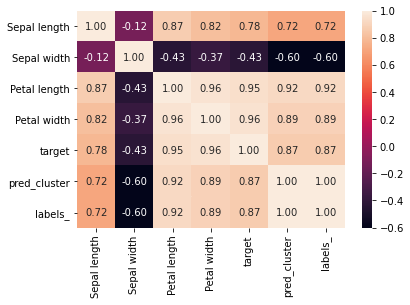

In [132]:
import seaborn as sns
sns.heatmap(df.corr(), fmt= '0.2f', annot= True)
plt.show()

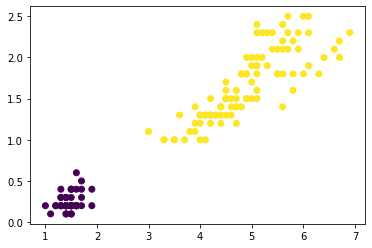

In [124]:
# scatter plot
plt.scatter(df['Petal length'],df['Petal width'],c=df['pred_cluster'])
plt.show()

## 검증: 교차테이블

In [116]:
y= df['target']
pd.crosstab(y, pred_cluster)

col_0,0,1
target,,
0,50,0
1,0,50
2,0,50


0.1 ------------------------------------------------------------ col_0   -1   0   1   2   3
target                    
0       14  19  10   7   0
1       44   0   0   0   6
2       50   0   0   0   0


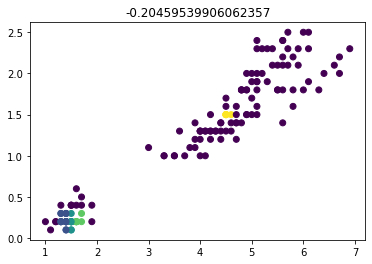

0.5 ------------------------------------------------------------ col_0    0   1
target        
0       50   0
1        0  50
2        0  50


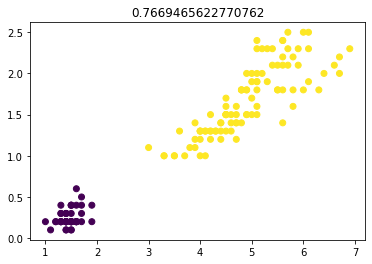

1.2 ------------------------------------------------------------ col_0    0   1
target        
0       50   0
1        0  50
2        0  50


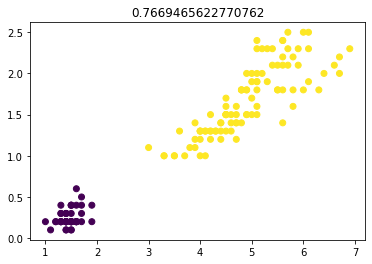

1.5 ------------------------------------------------------------ col_0    0
target    
0       50
1       50
2       50


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [135]:
eps = [0.1,0.5,1.2, 1.5]
for e in eps:
    dbscan = DBSCAN(eps = e, min_samples = 6, metric= 'euclidean')
    pred_cluster = dbscan.fit_predict(X_feature) #predict은 없음
    df['labels_'] = dbscan.labels_
    y= df['target']
    tab = pd.crosstab(y, pred_cluster)
    print(e,"--"* 30, tab)

    plt.scatter(df['Petal length'],df['Petal width'],c= pred_cluster)
    plt.title(silhouette_score(X_feature, dbscan.labels_))
    plt.show()


## 실루엣 계수



In [137]:
from IPython.display import Image
Image(url = 'https://t1.daumcdn.net/cfile/tistory/99BC644B5F4346CA10')

* a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 
* b(i): 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 

* 두 군집 간의 거리 값은 b(i) - a(i) 
* 이 값을 정규화 하기 위해 Max(a(i),b(i)) 값으로 나눈다. 


-1 < s(i) < 1
* 1로 가까워 질수록 근처의 군집과 더 멀리 떨어져 있다 
* 0에 가까울 수록 근처의 군집과 가까워 진다는 것이다.
* s(i)<0 : 아예 다른 군집에 데이터 포인트가 할당